<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import phik
from phik import phik_matrix

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

**Ответ:** этим мы устанавливаем  начальное значение для генератора случайных чисел, для того, чтобы обеспечить воспроизводимость результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [7]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [8]:
# 1.  Отобразите 10 случайных строк тренировочного датасета (0.15 балла)

df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [9]:
# 2.  Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)

pd.concat([df_test.head(5), df_test.tail(5)])

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0

In [10]:
# 3. Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
# Примечание: в задании не указано конкретно, над каким датасетом делать анализ,
# поэтому в этом случае я считаю что датасет - это объединение df_train + df_test

df = pd.concat([df_train, df_test], ignore_index=True)

missing_columns = df.columns[df.isnull().any()].tolist()
print("Колонки с пропусками:", missing_columns)

Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [11]:
# 4. Посмотрите, есть ли в данных явные дубликаты

duplicates_number = df.duplicated().sum()
print("В датасете есть дупликаты" if duplicates_number > 0  else "В датасете нет дупликатов")

В датасете есть дупликаты


In [12]:
# 5. Постройте дашборд, используя ydata-profilling(0.15 балла)

profile = ProfileReport(df, title="Дашборд датасета 'Cars'")

profile.to_file("report.html")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [13]:
def fill_missing_with_median(df):

    numeric_cols = df.select_dtypes(include=['number']).columns

    for column in numeric_cols:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

    return df

# заполняем для тренировочного
df_train = fill_missing_with_median(df_train)

# заполняем для тестового, если необходимо
if df_test.isna().sum().sum() > 0:
  df_test = fill_missing_with_median(df_test)

# убеждаемся, что пропусков больше нет
# (считаем только для числовых признаков, так как пропуски заполнялись только для них)
print(f"Число пропусков в тренировочном датасете после заполнения: {df_train.select_dtypes(include=['number']).isnull().sum().sum()}")
print(f"Число пропусков в тестовом датасете после заполнения: {df_test.select_dtypes(include=['number']).isnull().sum().sum()}")

Число пропусков в тренировочном датасете после заполнения: 0
Число пропусков в тестовом датасете после заполнения: 0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
# 1.  Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)

df_train_no_target = df_train.drop(columns=['selling_price'])

duplicates = df_train_no_target[df_train_no_target.duplicated()]

print("Число дубликатов: ", duplicates.shape[0])

Число дубликатов:  1159


In [15]:
# 2. Отобразите такие объекты (0.05 балла)

duplicates.head()

name  year  km_driven    fuel  \
254                  Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                          Maruti Swift VXI  2012      50000  Petrol   
268                    Maruti Swift Dzire VXI  2014      70000  Petrol   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                             Lexus ES 300h  2019      20000  Petrol   

    seller_type transmission         owner     mileage   engine   max_power  \
254  Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258  Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268  Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324      Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325      Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   

                  torque  seats  
254       114Nm@ 4000rpm    5.0  
258       114Nm@ 4000rpm    5.0  
268       114Nm@ 4000rpm    5.0  
324  430Nm@ 1750-2500rpm    5.0  
325  202Nm@ 3600-5200rpm    5.0

In [16]:
# 3. Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)

non_target_columns = list(df_train.columns)
non_target_columns.remove('selling_price')

df_train = df_train.drop_duplicates(subset=non_target_columns, keep='first')

In [17]:
# 4. Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)

df_train = df_train.reset_index(drop=True)

In [18]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [19]:
# 1. Уберите единицы измерения для признаков mileage, engine, max_power.

# метод для удаления
def remove_column_text(df, remove_dict):
    for column_name, text_list in remove_dict.items():

      for text in text_list:
        df[column_name] = df[column_name].str.replace(text, '', regex=False)

    # 2. Приведите тип данных к float.
    for column_name in remove_dict.keys():
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        df[column_name] = df[column_name].astype(float)

    return df

remove_dict = {
    'mileage': [' kmpl', ' km/kg'],
    'engine': [' CC'],
    'max_power': [' bhp'],
}

df_train = remove_column_text(df_train, remove_dict)
df_test = remove_column_text(df_test, remove_dict)

In [20]:
# 3. Удалите столбец torque

df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [22]:
# еще раз заполним пропуски столбцы медианами, так как теперь
# категориальные столбцы стали числовыми и там есть пропуски

df_train = fill_missing_with_median(df_train)

if df_test.isna().sum().sum() > 0:
  df_test = fill_missing_with_median(df_test)

In [23]:
# Осуществите приведение столбцов к необходимому типу.

df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
# Посчитайте основные статистики по числовым столбцам для трейна и теста

# Числовые статистики (трейн)
df_train.describe(include=['number'])

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [25]:
# Числовые статистики (тест)
df_test.describe(include=['number'])

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.338050  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951748   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.330000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.865230     5.403000  
std      34.887729     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      83.100000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [26]:
# Категориальные статистики (трейн)
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [27]:
# Категориальные статистики (тест)
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [28]:
# assert df_train.shape == (5840, 13) - всего 13 столбцов, но 1 ("torque") удалили - так что должны было остаться 12 колонок

assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

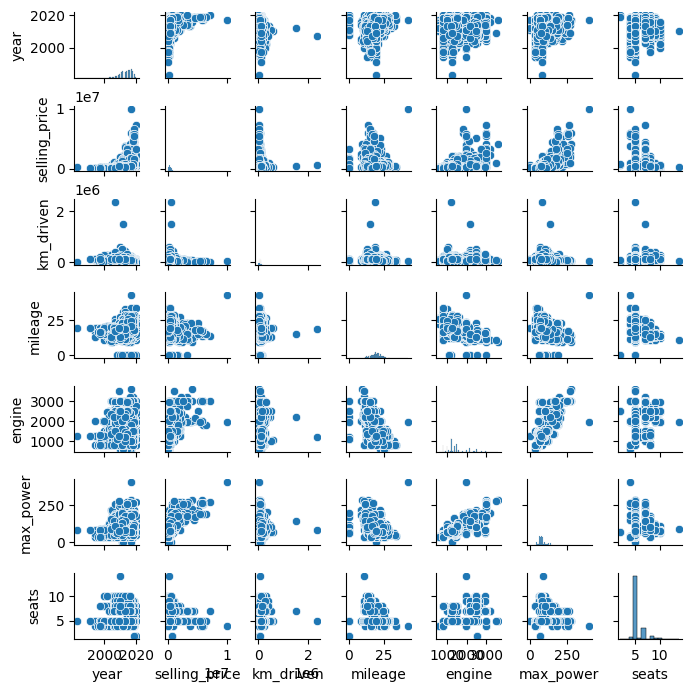

In [ ]:
# Шаг 1.

# 1. Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train

sns.pairplot(df_train.select_dtypes(include=['float', 'int']), height=1)

 Можно ли предположить на основе распределений связь признаков с целевой переменной?

 Ответ: да (например, чем выше max_power тем выше selling_price)

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Ответ: да (например, max_power коррелирует c engine)

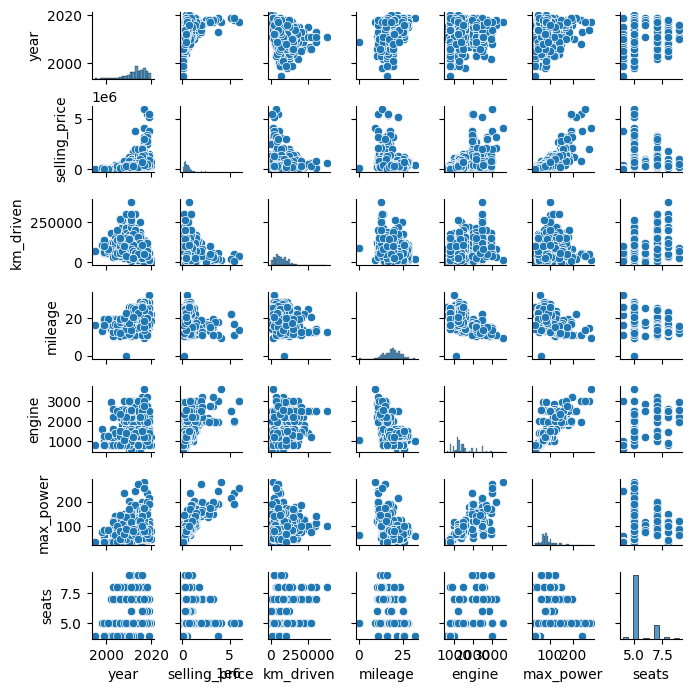

In [ ]:
# Шаг 2.

# 2. Постройте pairplot по тестовым данным

sns.pairplot(df_test.select_dtypes(include=['float', 'int']), height=1)

Похожими ли оказались совокупности при разделении на трейн и тест?

Ответ: да (в общем - да, но, конечно, есть определенные различия)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


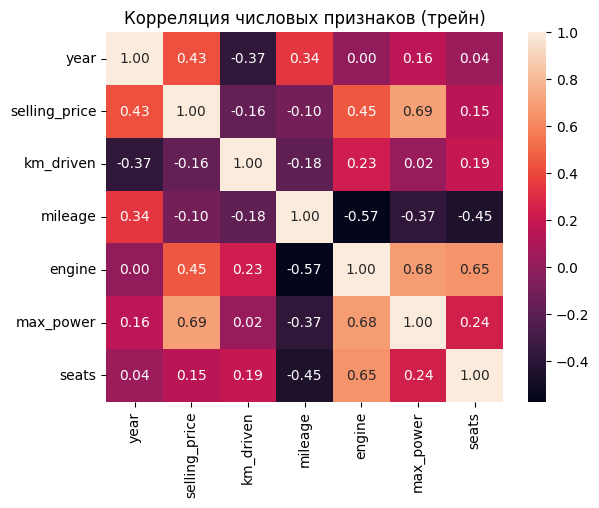

In [ ]:
# 2. Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()

corr_matrix = df_train.select_dtypes(include=['float', 'int']).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

# Отображаем график
plt.title("Корреляция числовых признаков (трейн)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Какие 2 признака наименее скоррелированы между собой?

**Ответ:** year и engine

Между какими наблюдается довольно сильная положительная линейная зависимость?

**Ответ:** engine и max_power (или selling_price и max_power, если целевую переменную считать как признак)

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ:**  да, корреляция -0.37, что значит, чем меньше year (год выпука), тем больше km_driven

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

interval columns not set, guessing: ['selling_price']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


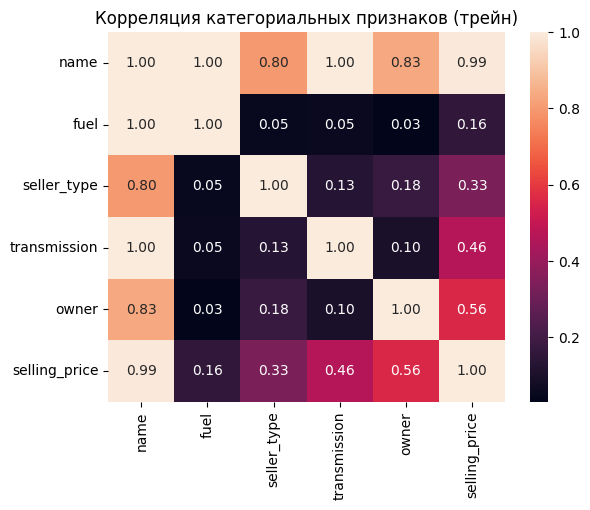

In [ ]:
# мы не исследовали корреляцию целевой переменной с категориальными признаками

sns.heatmap(df_train.select_dtypes(include=['object']).join(df_train[['selling_price']]).phik_matrix(), annot=True, fmt='.2f')

# Отображаем график
plt.title("Корреляция категориальных признаков (трейн)")
plt.show()

Вывод: все категориальные признаки сильно коррелируют с переменной name

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [29]:
float_train_df = df_train.select_dtypes(include=['float', 'int']).copy()

y_train = df_train['selling_price']
X_train = float_train_df.drop(columns=['selling_price'])

In [30]:
assert X_train.shape == (5840, 6)

In [31]:
float_test_df = df_test.select_dtypes(include=['float', 'int']).copy()

y_test = df_test['selling_price']
X_test = float_test_df.drop(columns=['selling_price'])

In [32]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Обучите классическую линейную регрессию с дефолтными параметрами
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print("Тренировочная выборка")
print(f"R^2: {r2_train:.3f}")
print(f"MSE: {mse_train:.3f}")
print("\n")
print("Тестовая выборка")
print(f"R^2: {r2_test:.3f}")
print(f"MSE: {mse_test:.3f}")

Тренировочная выборка
R^2: 0.592
MSE: 116874153930.029


Тестовая выборка
R^2: 0.594
MSE: 233298786264.125


Вывод: качество модели не особо высокое.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print("Тренировочная выборка")
print(f"R^2: {r2_train:.3f}")
print(f"MSE: {mse_train:.3f}")
print("\n")
print("Тестовая выборка")
print(f"R^2: {r2_test:.3f}")
print(f"MSE: {mse_test:.3f}")

Тренировочная выборка
R^2: 0.592
MSE: 116874153930.029


Тестовая выборка
R^2: 0.594
MSE: 233298786264.120


Вывод: качество не изменилось

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [38]:
impact_df = (pd.DataFrame(abs(model.coef_), index=X_train.columns, columns=['coef'])
              .sort_values(by='coef', ascending=False))

print(f"Наиболее важный признак: {impact_df.index[0]}, его коэффициент: {impact_df['coef'].iloc[0]}")

Наиболее важный признак: year, его коэффициент: 37304.62782737066


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
# 1. Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качествоf

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print("Тренировочная выборка")
print(f"R^2: {r2_train_lasso:.3f}")
print(f"MSE: {mse_train_lasso:.3f}")
print("\n")
print("Тестовая выборка")
print(f"R^2: {r2_test_lasso:.3f}")
print(f"MSE: {mse_test_lasso:.3f}")

# Ответ: качество не изменилось

Тренировочная выборка
R^2: 0.592
MSE: 116874153940.143


Тестовая выборка
R^2: 0.594
MSE: 233299457812.370


In [40]:
# 2. Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему

lasso_df = (pd.DataFrame(abs(lasso.coef_), index=X_train.columns, columns=['coef'])
              .sort_values(by='coef', ascending=True))

lasso_df

coef
seats       23206.255649
mileage     28832.043396
km_driven   44157.689858
engine      61173.662409
year       152772.390214
max_power  322808.236919

Ответ: нет не занулила. Это может быть, потому что признаков не так много (всего 6) и каждый признак вносит свою лепту в предсказание, плюс даже если признаки скореллированы друг с другом, то эта корреляция не очень высокая

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000], # коэффициент альфа, всего 6 вариантов
    'max_iter': [1000, 5000, 10000], # максимальное число итераций, всего 3 варианта
    'positive': [True, False] # делать ли параметры неотрицательными, всего 2 варианта
}
# для каждого параметра будет 10 моделей, по каждой на фолд


lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print(f"Лучший параметры: {grid_search.best_params_}")

# проверим результаты MSE и R^2
y_test_pred_lasso = grid_search.predict(X_test_scaled)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"MSE (трейн): {mse_test_lasso:.3f}")
print(f"R^2 (тест): {r2_test_lasso:.3f}")

lasso = grid_search.best_estimator_

Лучший параметры: {'alpha': 1000, 'max_iter': 1000, 'positive': False}
MSE (трейн): 233978315685.055
R^2 (тест): 0.593


1. всего моделей: 6 * 3 * 2 * 10 (столько фолдов для каждой) = 360

2. описание параметров можно видет в комментариях

In [ ]:
lasso_gs_df = (pd.DataFrame(abs(grid_search.best_estimator_.coef_), index=X_train.columns, columns=['coef'])
              .sort_values(by='coef', ascending=True))

lasso_gs_df

coef
seats       20352.142469
mileage     27010.694999
km_driven   43052.234680
engine      56435.714938
year       152556.386616
max_power  323666.834812

3. У лучшей модели коэф. регуляризации равен 1000 ('alpha': 1000)

4. Никакие веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000], # коэффициент альфа, всего 6 вариантов
    'max_iter': [1000, 5000, 10000], # максимальное число итераций, всего 3 варианта
    'positive': [True, False], # делать ли параметры неотрицательными, всего 2 варианта
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  # соотношение L1 и L2 регуляризации, всего 6 вариантов
}
# для каждого параметра будет 10 моделей, по каждой на фолд

elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат (MSE): {-grid_search.best_score_}")

y_test_pred_elastic = grid_search.predict(X_test_scaled)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)
mse_test_elastic = MSE(y_test, y_test_pred_elastic)

print(f"MSE (тест): {mse_test_elastic:.3f}")
print(f"R^2 (тест): {r2_test_elastic:.3f}")

elastic_net = grid_search.best_estimator_

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000, 'positive': False}
Лучший результат (MSE): 121289081162.62993
MSE (тест): 234562925647.806
R^2 (тест): 0.592


1. всего моделей: 6 * 3 * 2 * 6 * 10 = 2160

2. Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000, 'positive': False} (описание параметров можно видет выше)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# не удаляем, в следующей пункте обработаем, но код для удаления такой:
# df_train = df_train.drop(columns=['name'])
# df_test = df_test.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [45]:
# трейн

# подгружаем датасет из категориальных и отскалированных числовых признаков
cat_train_df = df_train.select_dtypes(include=['object']).copy()

float_scaled_train_df = pd.DataFrame(X_train_scaled, columns=float_train_df.drop(columns=['selling_price', ]).columns)
cat_train_df = cat_train_df.join(float_scaled_train_df, how='left')

# название модели поменяем на бренд
cat_train_df['brand'] = cat_train_df['name'].str.split().str[0]
cat_train_df = cat_train_df.drop(columns=['name'])

cat_train_df.head()

fuel seller_type transmission         owner      year  km_driven  \
0  Diesel  Individual       Manual   First Owner  0.139570   1.191152   
1  Diesel  Individual       Manual  Second Owner  0.139570   0.766619   
2  Diesel  Individual       Manual   First Owner -0.837167   0.883158   
3  Petrol  Individual       Manual   First Owner -1.569719   0.766619   
4  Petrol  Individual       Manual   First Owner  0.872122  -0.482007   

    mileage    engine  max_power     seats    brand  
0  0.995867 -0.373643  -0.439550 -0.434419   Maruti  
1  0.428830  0.141162   0.493513 -0.434419    Skoda  
2  0.895506 -0.068879   0.066175 -0.434419  Hyundai  
3 -0.835712 -0.270682   0.009281 -0.434419   Maruti  
4  0.177929 -0.478663  -0.191113 -0.434419  Hyundai

In [46]:
# трейн

cat_test_df = df_test.select_dtypes(include=['object']).copy()
float_scaled_test_df = pd.DataFrame(X_test_scaled, columns=float_test_df.drop(columns=['selling_price']).columns)
cat_test_df = cat_test_df.join(float_scaled_test_df, how='left')

# название модели поменяем на бренд
cat_test_df['brand'] = cat_test_df['name'].str.split().str[0]
cat_test_df = cat_test_df.drop(columns=['name'])

cat_test_df.head()

fuel seller_type transmission         owner      year  km_driven  \
0  Diesel  Individual       Manual   First Owner -0.837167   1.565740   
1  Diesel  Individual       Manual   First Owner  0.872122  -0.814974   
2  Petrol  Individual    Automatic   First Owner -1.569719   2.405866   
3  Diesel  Individual       Manual   First Owner  0.383754   1.648982   
4  Petrol  Individual       Manual  Second Owner -0.592983  -0.065798   

    mileage    engine  max_power     seats     brand  
0 -1.362605  2.200379   0.761548  1.601702  Mahindra  
1  0.519155  0.139102   0.650920 -0.434419      Tata  
2 -1.638596  0.760986   1.330489 -0.434419     Honda  
3  1.422399  0.141162   0.338003 -0.434419     Honda  
4 -0.735352 -0.530144  -0.724021 -0.434419      Tata

In [47]:
# assert X_train_cat.shape == (5840, 10) - так как name оствили, то не 10, а 11 признаков
assert cat_train_df.shape == (5840, 11)

In [48]:
#X_train_cat.describe(include='object')
cat_train_df.describe(include='object')

fuel seller_type transmission        owner   brand
count     5840        5840         5840         5840    5840
unique       4           3            2            5      30
top     Diesel  Individual       Manual  First Owner  Maruti
freq      3177        5223         5336         3603    1804

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [49]:
from sklearn.preprocessing import OneHotEncoder

# drop='first' избавит от мультиколлинеарности
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# переведем seats в категориальный
cat_train_df['seats'] = df_train['seats'].astype('object')

cat_columns = cat_train_df.select_dtypes(include=['object']).columns

cat_train_encoded = encoder.fit_transform(cat_train_df[cat_columns])

ohe_matrix = pd.DataFrame.sparse.from_spmatrix(cat_train_encoded, columns=encoder.get_feature_names_out())

# матрица отскалированных числовых и ohe категориальных
float_scaled_cat_ohe_df = ohe_matrix.join(float_scaled_train_df.drop(columns=['seats']), how='left')
float_scaled_cat_ohe_df.head()

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0         0            0                     1.0   
1          1.0         0            0                     1.0   
2          1.0         0            0                     1.0   
3            0         0          1.0                     1.0   
4            0         0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                             0                  1.0   
1                             0                  1.0   
2                             0                  1.0   
3                             0                  1.0   
4                             0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                           0                   0                     0   
1                           0                 1.0                     0   
2                           0                   0                     0   
3                           0                   0                     0   
4                           0                   0                     0   

   owner_Third Owner  ...  brand_Skoda  brand_Tata  brand_Toyota  \
0                  0  ...            0           0             0   
1                  0  ...          1.0           0             0   
2                  0  ...            0           0             0   
3                  0  ...            0           0             0   
4                  0  ...            0           0             0   

   brand_Volkswagen  brand_Volvo      year  km_driven   mileage    engine  \
0                 0            0  0.139570   1.191152  0.995867 -0.373643   
1                 0            0  0.139570   0.766619  0.428830  0.141162   
2                 0            0 -0.837167   0.883158  0.895506 -0.068879   
3                 0            0 -1.569719   0.766619 -0.835712 -0.270682   
4                 0            0  0.872122  -0.482007  0.177929 -0.478663   

   max_power  
0  -0.439550  
1   0.493513  
2   0.066175  
3   0.009281  
4  -0.191113  

[5 rows x 52 columns]

In [50]:
# проделаем тоже для тест

# переведем seats в категориальный
cat_test_df['seats'] = df_test['seats'].astype('object')

cat_columns = cat_test_df.select_dtypes(include=['object']).columns

cat_test_encoded = encoder.transform(cat_test_df[cat_columns])

ohe_matrix_test = pd.DataFrame.sparse.from_spmatrix(cat_test_encoded, columns=encoder.get_feature_names_out())

# матрица отскалированных числовых и ohe категориальных
float_scaled_cat_ohe_df_test = ohe_matrix_test.join(float_scaled_test_df.drop(columns=['seats']), how='left')

float_scaled_cat_ohe_df_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0         0            0                     1.0   
1          1.0         0            0                     1.0   
2            0         0          1.0                     1.0   
3          1.0         0            0                     1.0   
4            0         0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                             0                  1.0   
1                             0                  1.0   
2                             0                    0   
3                             0                  1.0   
4                             0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                           0                   0                     0   
1                           0                   0                     0   
2                           0                   0                     0   
3                           0                   0                     0   
4                           0                 1.0                     0   

   owner_Third Owner  ...  brand_Skoda  brand_Tata  brand_Toyota  \
0                  0  ...            0           0             0   
1                  0  ...            0         1.0             0   
2                  0  ...            0           0             0   
3                  0  ...            0           0             0   
4                  0  ...            0         1.0             0   

   brand_Volkswagen  brand_Volvo      year  km_driven   mileage    engine  \
0                 0            0 -0.837167   1.565740 -1.362605  2.200379   
1                 0            0  0.872122  -0.814974  0.519155  0.139102   
2                 0            0 -1.569719   2.405866 -1.638596  0.760986   
3                 0            0  0.383754   1.648982  1.422399  0.141162   
4                 0            0 -0.592983  -0.065798 -0.735352 -0.530144   

   max_power  
0   0.761548  
1   0.650920  
2   1.330489  
3   0.338003  
4  -0.724021  

[5 rows x 52 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {
    'alpha': [0.001, 0.1, 1, 10, 100, 1000]
}
# всего 6 * 10 моделей

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10)
grid_search.fit(float_scaled_cat_ohe_df.values, y_train)

print("Лучшее значение alpha:", grid_search.best_params_['alpha'])
print("Лучший R2:", grid_search.best_score_)

ridge = grid_search.best_estimator_

Лучшее значение alpha: 1
Лучший R2: 0.7105153766102142


Вывод: да, качество стало лучше

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    percent_diff = (np.abs((y_pred - y_true))  / y_true) * 100

    within_10_percent = np.mean(percent_diff <= 10)

    return within_10_percent

models = [linreg, elastic_net, lasso, ridge]

results = {}

for model in models:
    model.fit(float_scaled_cat_ohe_df.values, y_train)
    y_pred = model.predict(float_scaled_cat_ohe_df_test.values)
    metric_value = business_metric(y_test, y_pred)
    print(f"{model.__class__.__name__}: {metric_value}")
    results[model.__class__.__name__] = metric_value

best_model = max(results, key=results.get)
best_metric_value = results[best_model]
print("\n")
print("Лучшая модель:", best_model)
print("Значение метрики для лучшей модели:", best_metric_value)

LinearRegression: 0.321
ElasticNet: 0.247
Lasso: 0.273
Ridge: 0.307


Лучшая модель: LinearRegression
Значение метрики для лучшей модели: 0.321


In [ ]:
# проверим R^2

models = [linreg, elastic_net, lasso, ridge]

results = {}

for model in models:
    model.fit(float_scaled_cat_ohe_df.values, y_train)
    y_pred = model.predict(float_scaled_cat_ohe_df_test.values)
    metric_value = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {metric_value}")
    results[model] = metric_value

best_model = max(results, key=results.get)
best_metric_value = results[best_model]
print("\n")
print("Лучшая модель:", best_model)
print("Значение метрики для лучшей модели:", best_metric_value)

LinearRegression: 0.784655707527125
ElasticNet: 0.6951693927190534
Lasso: 0.7194882493694668
Ridge: 0.7807934974285803


Лучшая модель: LinearRegression()
Значение метрики для лучшей модели: 0.784655707527125


Лучшая модель для решения задачи бизнеса - LinearRegression

In [ ]:
# сохраняем модель

# так как seats больше не категориальная - переобучим scaler
scaler = StandardScaler()
_ = scaler.fit_transform(X_train.drop(columns=['seats']))

import pickle

inference_data = {
    "scaler": {
        "mean": scaler.mean_,
        "scale": scaler.scale_
    },
    "encoder": encoder,
    "model": {
        "coef": best_model.coef_,
        "intercept": best_model.intercept_
    }
}

with open('inference_data.pkl', 'wb') as file:
    pickle.dump(inference_data, file)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
# в .py code

# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [ ]:
best_model.predict(float_scaled_cat_ohe_df_test.loc[0].to_frame().T)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([570373.94622353])

Скриншот из Postman с аналогичными данными. Видно, что ответы совпали

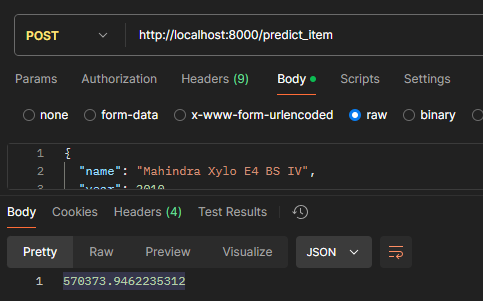

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Ответ: думаю, что кот Сабины!